# <b><p style="background-color: #ff6200; font-family:calibri; color:white; font-size:100%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Month 01 (Mini-project) Data Analysis</p>

<div style="border-radius:10px; padding: 15px; background-color: #fbab60; font-size:110%; text-align:left; color:#000000">
    
It is time for a project that covers all the concepts you have learned so far: Data Analysis. I have provided you with a dataset of university enrollment. The university has started offering online courses to reach a wider range of students and wants your help to understand enrollment trends. You are asked to use the concepts you have learned, such as statistics, data cleaning, transformations (if needed), and visualizations, to find important insights from the dataset. Specifically, identify what contributes to higher enrollment and determine if the course type (online or classroom) is a significant factor. This is an unguided project, so you will need to apply your understanding independently as no guided questions will be provided.

<a id=1></a>
# <span style='color:#ff6200'> Importing Libraries</span>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

<a id=1></a>
# <span style='color:#ff6200'> Loading Dataset</span>

In [2]:
df = pd.read_csv('university_enrollment_(Mini-project-01).csv')
df

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,NaN,Science
2,3,online,2016,257,57.24,80.0,NaN,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science
...,...,...,...,...,...,...,...,...
1845,1846,classroom,2018,155,60.01,81.0,Intermediate,Science
1846,1847,online,2016,261,94.27,85.0,NaN,Technology
1847,1848,online,2011,257,76,81.0,NaN,Mathematics
1848,1849,online,2013,256,20.67,66.0,NaN,Math


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         1850 non-null   int64  
 1   course_type       1850 non-null   object 
 2   year              1850 non-null   int64  
 3   enrollment_count  1850 non-null   int64  
 4   pre_score         1850 non-null   object 
 5   post_score        1665 non-null   float64
 6   pre_requirement   959 non-null    object 
 7   department        1850 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 115.8+ KB


In [4]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
course_id,1850.0,NaN,NaN,NaN,925.5,534.193317,1.0,463.25,925.5,1387.75,1850.0
course_type,1850,2,online,1375,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,1850.0,NaN,NaN,NaN,2016.423784,3.448278,2011.0,2013.0,2016.0,2019.0,2022.0
enrollment_count,1850.0,NaN,NaN,NaN,231.565405,36.987029,154.0,185.0,251.0,261.0,267.0
pre_score,1850,1594,-,130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
post_score,1665.0,NaN,NaN,NaN,75.204805,8.511981,51.0,69.0,75.0,81.0,105.0
pre_requirement,959,2,Beginner,654,NaN,NaN,NaN,NaN,NaN,NaN,NaN
department,1850,5,Technology,719,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id=1></a>
# <span style='color:#ff6200'> Basic analysis</span>

In [5]:
df.isnull().sum()

course_id             0
course_type           0
year                  0
enrollment_count      0
pre_score             0
post_score          185
pre_requirement     891
department            0
dtype: int64

In [6]:
df['course_type'].value_counts()

course_type
online       1375
classroom     475
Name: count, dtype: int64

In [7]:
df['department'].value_counts()

department
Technology     719
Science        472
Mathematics    220
Math           220
Engineering    219
Name: count, dtype: int64

In [8]:
df['pre_requirement'].unique()

array(['Beginner', nan, 'Intermediate'], dtype=object)

In [9]:
df['enrollment_count'].unique()

array([165, 175, 257, 251, 246, 241, 261, 180, 170, 256, 231, 181, 236,
       185, 247, 155, 160, 161, 266, 237, 242, 255, 245, 248, 252, 238,
       232, 235, 171, 258, 240, 169, 190, 267, 156, 182, 176, 179, 154,
       250, 249, 159, 166, 164, 262], dtype=int64)

In [10]:
df['post_score'].unique()

array([ 73.,  86.,  80.,  75.,  76.,  84.,  88.,  87.,  79.,  74.,  85.,
        81.,  70.,  65.,  nan,  72.,  77.,  83.,  67.,  96.,  82.,  94.,
        66.,  91.,  63.,  61.,  78.,  62.,  90.,  69.,  60.,  71.,  95.,
        68.,  54.,  64., 105.,  57.,  98.,  55.,  56.,  59.,  93.,  51.,
        89.,  92.,  58.,  97.,  99., 100.,  53., 102., 101., 103.])

<a id=1></a>
# <span style='color:#ff6200'> Cleaning and Preprocessing</span>

#### Handling Missing Values

In [11]:
df['pre_requirement'].fillna('Beginner', inplace=True)

In [12]:
mean_score  = int(df['post_score'].mean())
df['post_score'].fillna(mean_score, inplace=True)

<div style="border-radius:10px; padding: 15px; background-color: #fbab60; font-size:110%; text-align:left; color:#000000">
    
To handle the missing values in the pre_requirement column, we filled these missing entries with the value "Beginner." This decision was based on the assumption that if no prerequisite is specified, it implies that the course is suitable for beginners who can start without any prior knowledge or requirements.

In [13]:
df.isnull().sum()

course_id           0
course_type         0
year                0
enrollment_count    0
pre_score           0
post_score          0
pre_requirement     0
department          0
dtype: int64

In [14]:
df['pre_score'] = pd.to_numeric(df['pre_score'], errors='coerce')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         1850 non-null   int64  
 1   course_type       1850 non-null   object 
 2   year              1850 non-null   int64  
 3   enrollment_count  1850 non-null   int64  
 4   pre_score         1720 non-null   float64
 5   post_score        1850 non-null   float64
 6   pre_requirement   1850 non-null   object 
 7   department        1850 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 115.8+ KB


<a id=1></a>
# <span style='color:#ff6200'> Visualiztions</span>

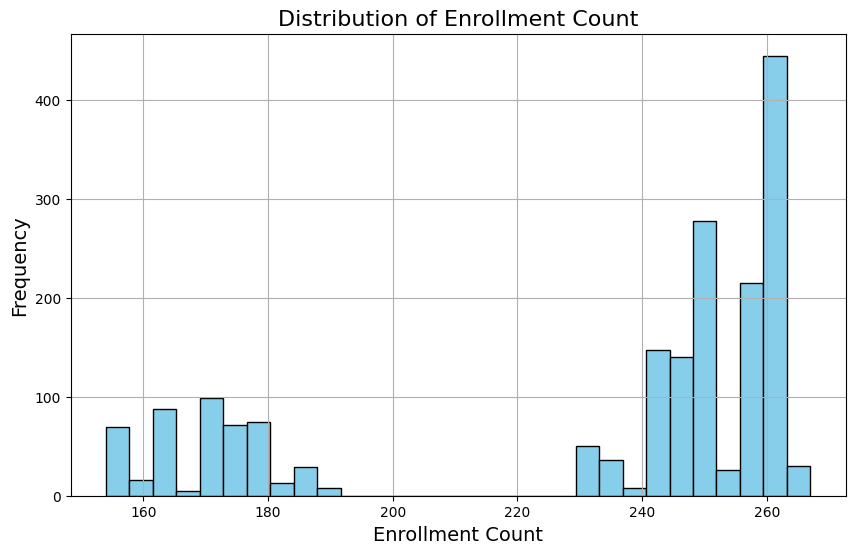

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(df['enrollment_count'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Enrollment Count', fontsize=16)
plt.xlabel('Enrollment Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

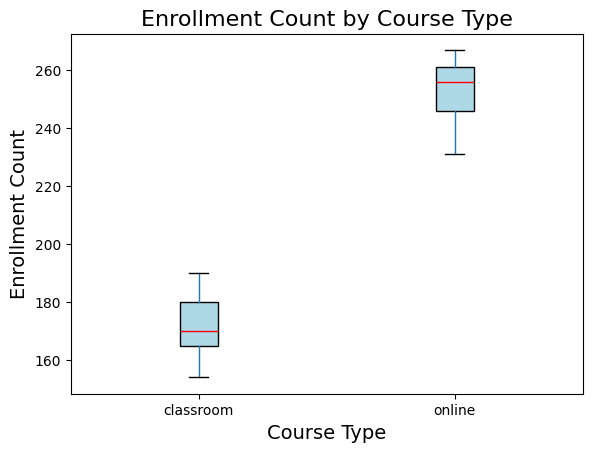

In [17]:
plt.figure(figsize=(10, 6))
df.boxplot(column='enrollment_count', by='course_type', grid=False, patch_artist=True,
             boxprops=dict(facecolor='lightblue'), medianprops=dict(color='red'))
plt.title('Enrollment Count by Course Type', fontsize=16)
plt.suptitle('')
plt.xlabel('Course Type', fontsize=14)
plt.ylabel('Enrollment Count', fontsize=14)
plt.show()

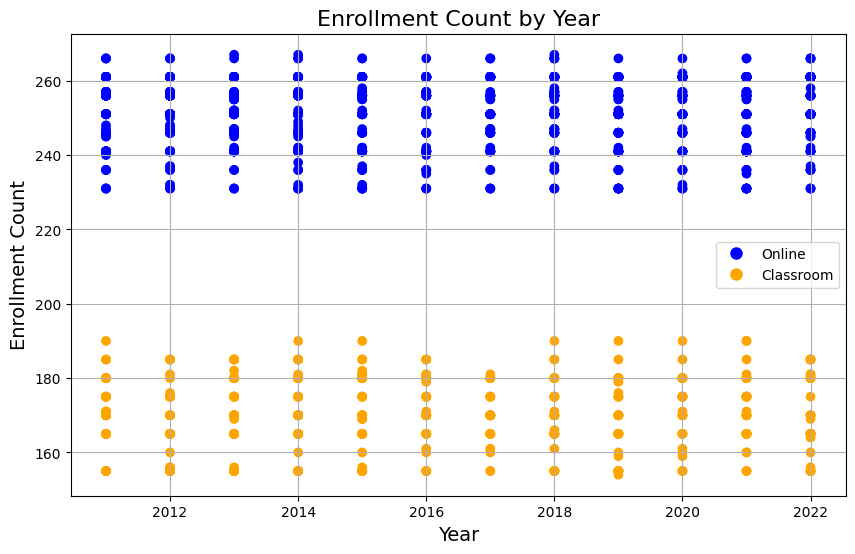

In [18]:
plt.figure(figsize=(10, 6))
colors = {'online': 'blue', 'classroom': 'orange'}
plt.scatter(df['year'], df['enrollment_count'], c=df['course_type'].map(colors))
plt.title('Enrollment Count by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Enrollment Count', fontsize=14)
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Online'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Classroom')])
plt.grid(True)
plt.show()

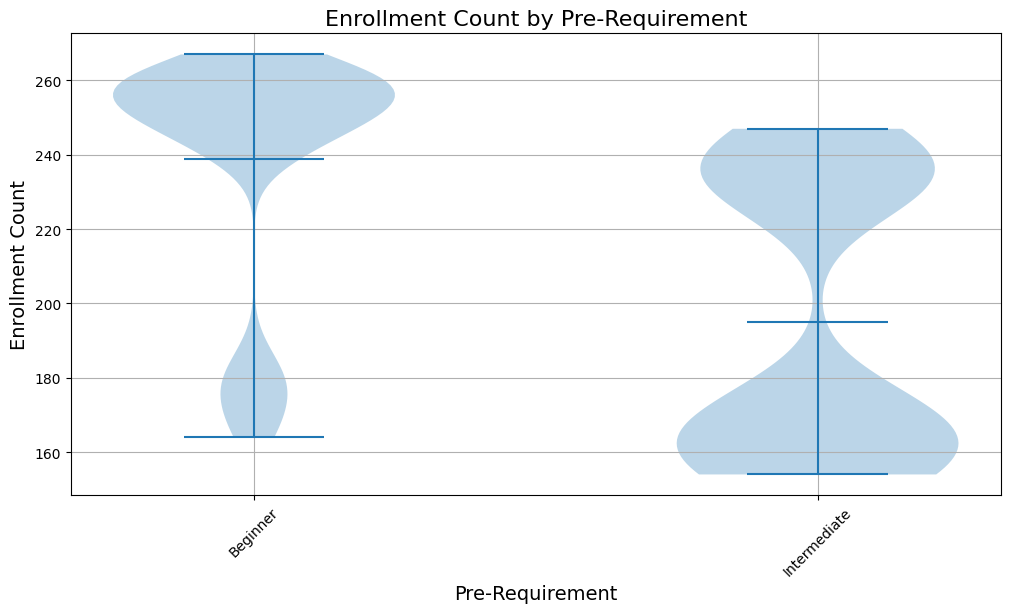

In [19]:
pre_req_groups = df.groupby('pre_requirement')['enrollment_count']
plt.figure(figsize=(12, 6))
plt.violinplot([group for name, group in pre_req_groups], showmeans=True)
plt.xticks(range(1, len(pre_req_groups.groups) + 1), pre_req_groups.groups.keys(), rotation=45)
plt.title('Enrollment Count by Pre-Requirement', fontsize=16)
plt.xlabel('Pre-Requirement', fontsize=14)
plt.ylabel('Enrollment Count', fontsize=14)
plt.grid(True)
plt.show()

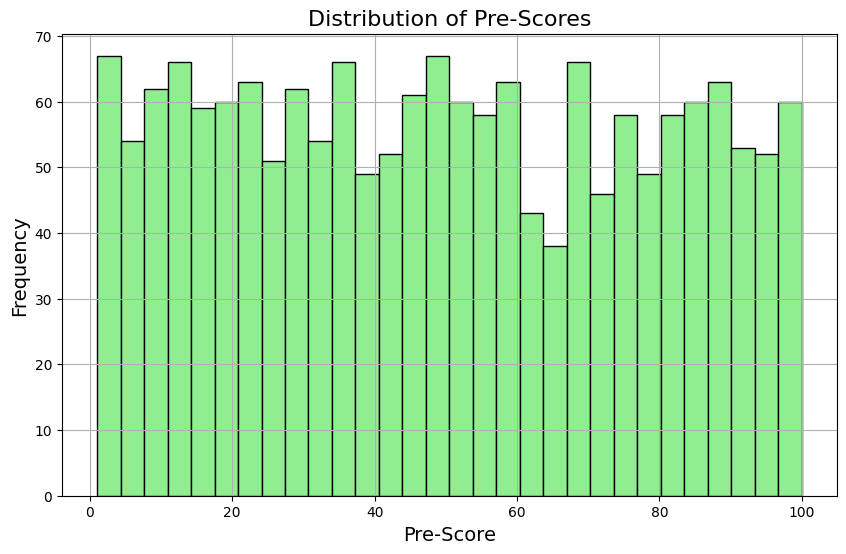

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(df['pre_score'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Pre-Scores', fontsize=16)
plt.xlabel('Pre-Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

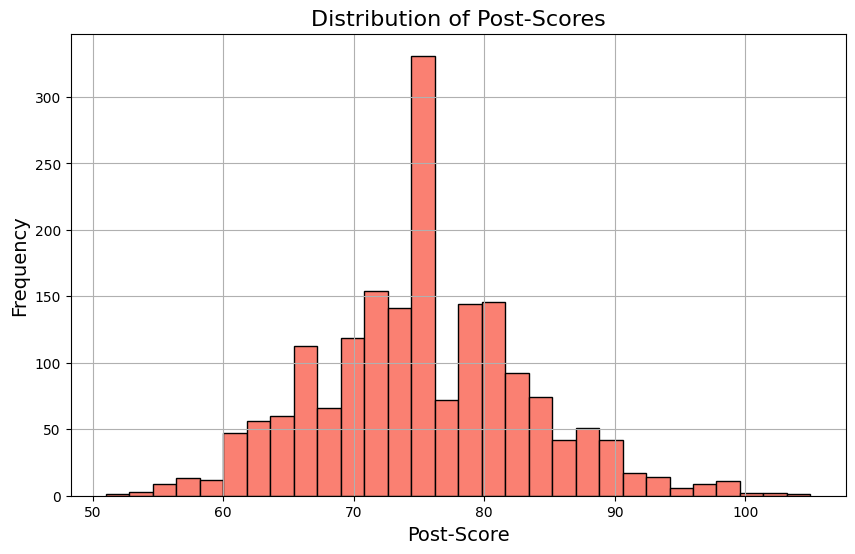

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(df['post_score'], bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of Post-Scores', fontsize=16)
plt.xlabel('Post-Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

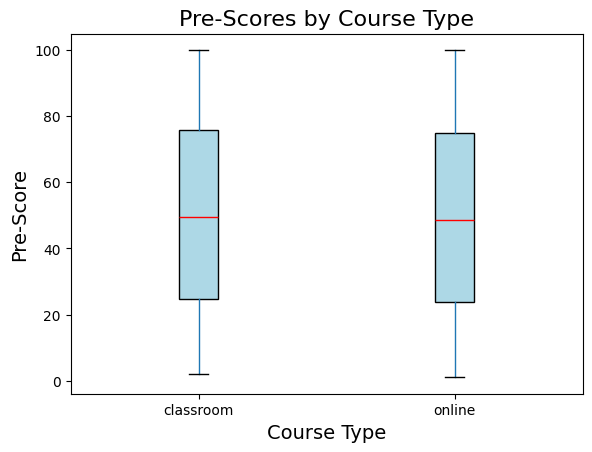

In [22]:
plt.figure(figsize=(10, 6))
df.boxplot(column='pre_score', by='course_type', grid=False, patch_artist=True,
             boxprops=dict(facecolor='lightblue'), medianprops=dict(color='red'))
plt.title('Pre-Scores by Course Type', fontsize=16)
plt.suptitle('')
plt.xlabel('Course Type', fontsize=14)
plt.ylabel('Pre-Score', fontsize=14)
plt.show()

<Figure size 1000x600 with 0 Axes>

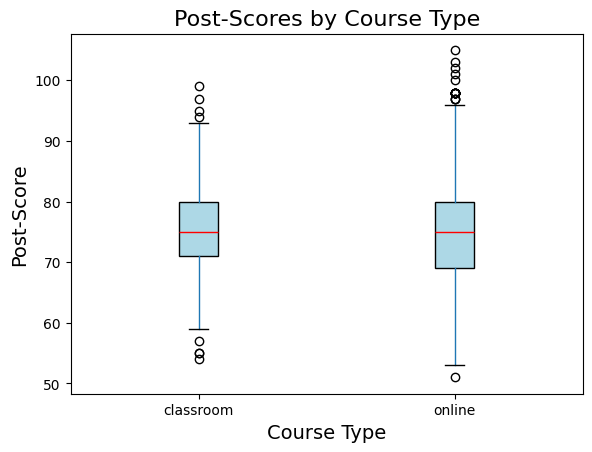

In [23]:
plt.figure(figsize=(10, 6))
df.boxplot(column='post_score', by='course_type', grid=False, patch_artist=True,
             boxprops=dict(facecolor='lightblue'), medianprops=dict(color='red'))
plt.title('Post-Scores by Course Type', fontsize=16)
plt.suptitle('')
plt.xlabel('Course Type', fontsize=14)
plt.ylabel('Post-Score', fontsize=14)
plt.show()

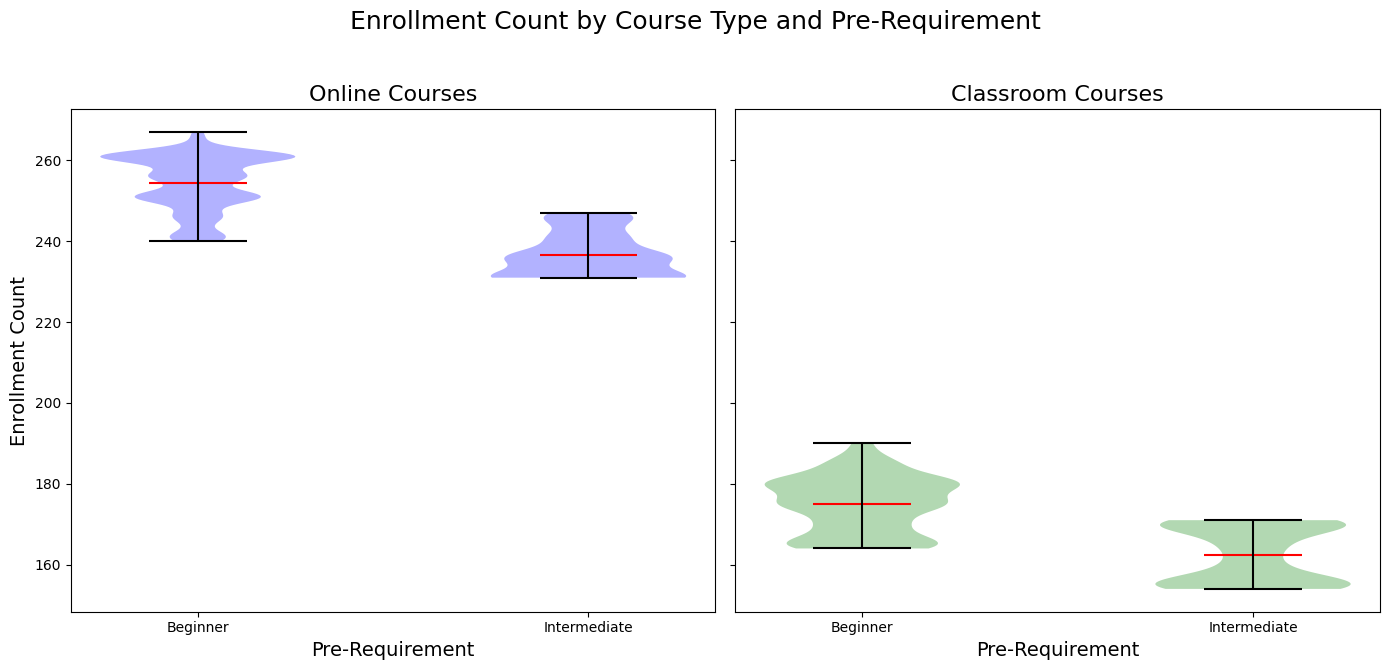

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(14, 7), sharey=True)

online_data = df[df['course_type'] == 'online']
parts = ax[0].violinplot([online_data[online_data['pre_requirement'] == 'Beginner']['enrollment_count'],
                          online_data[online_data['pre_requirement'] == 'Intermediate']['enrollment_count']],
                         showmeans=True)
for pc in parts['bodies']:
    pc.set_facecolor('blue')
parts['cmeans'].set_color('red')
parts['cmaxes'].set_color('black')
parts['cmins'].set_color('black')
parts['cbars'].set_color('black')
ax[0].set_title('Online Courses', fontsize=16)
ax[0].set_xticks([1, 2])
ax[0].set_xticklabels(['Beginner', 'Intermediate'])
ax[0].set_xlabel('Pre-Requirement', fontsize=14)
ax[0].set_ylabel('Enrollment Count', fontsize=14)

classroom_data = df[df['course_type'] == 'classroom']
parts = ax[1].violinplot([classroom_data[classroom_data['pre_requirement'] == 'Beginner']['enrollment_count'],
                          classroom_data[classroom_data['pre_requirement'] == 'Intermediate']['enrollment_count']],
                         showmeans=True)
for pc in parts['bodies']:
    pc.set_facecolor('green')
parts['cmeans'].set_color('red')
parts['cmaxes'].set_color('black')
parts['cmins'].set_color('black')
parts['cbars'].set_color('black')
ax[1].set_title('Classroom Courses', fontsize=16)
ax[1].set_xticks([1, 2])
ax[1].set_xticklabels(['Beginner', 'Intermediate'])
ax[1].set_xlabel('Pre-Requirement', fontsize=14)

plt.suptitle('Enrollment Count by Course Type and Pre-Requirement', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


<a id=1></a>
# <span style='color:#ff6200'>what contributes to higher enrollment and determine if the course type (online or classroom) is a significant factor? </span>

<div style="border-radius:10px; padding: 15px; background-color: #fbab60; font-size:110%; text-align:left; color:#000000">
    
## Analysis Summary: Factors Contributing to Higher Enrollment
Based on the analysis and visualizations, we have identified the following key insights regarding enrollment trends:

## Course Type:

- Online Courses: Enrollment counts are generally higher in online courses compared to classroom courses.
- Classroom Courses: Enrollment counts are relatively lower in classroom courses.
## Pre-Requirement Level:

- Beginner Level: Courses designed for beginners have higher enrollment counts. This trend is observed in both online and classroom courses.
- Intermediate Level: Courses with intermediate pre-requirements tend to have lower enrollment counts across both course types.
## Significance of Course Type
The analysis indicates that the course type (online or classroom) is a significant factor affecting enrollment numbers. Online courses consistently attract more students, likely due to their flexibility and accessibility, which appeal to a wider audience.